# Microchip Classification Inferencing ipynb

In [1]:
import tensorflow as tf
tf.__version__
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os # directory
import seaborn as sns # plotting
import math
import re
import time

from sklearn.metrics import confusion_matrix
from scipy import stats # mean calculation
from keras.utils.np_utils import to_categorical # to convert labels to one-hot-encoding
from PIL import Image

Using TensorFlow backend.


In [2]:
class predictor():
    def __init__(self, model_path = './models/a/'):
        self.models = []
        for count in range(1,11):
            model = tf.keras.models.load_model(model_path+'model_10_16_15_{}.h5'.format(count))
            self.models.append(model)
        self.dic = {0: 'Capacitor', 1: 'Resistor', 2: 'Sot', 3: 'Unknown'}
    
    def read_img(self, path):
        def readImg(path, n=27):
            im = Image.open(path)
            im = im.resize((n,n))
            im_g = im.convert('L')
            return np.array(im)/255.0, np.array(im_g)/255.0
        
        image_count = 0
        im_names = []
        if path.endswith('.jpg'):
            image_count += 1
            im, im_g = readImg(path)
            im_g = np.reshape(im_g, (-1,27,27,1))
            im_names.append(re.split(r'/|\\',path)[-1])
            return image_count, im_names, im, im_g
        else:
            lim = []
            lim_g = []
            for img_path in os.listdir(path):
                if img_path.endswith('.jpg'):
                    image_count += 1
                    im, im_g = readImg(path+'/'+img_path)
                    lim.append(im)
                    lim_g.append(im_g)
                    im_names.append(img_path)
            lim_g = np.reshape(lim_g, (-1,27,27,1))
            return image_count, im_names, lim, lim_g
    
    def test(self, path):
        pred = []
        names = []
        image_count, im_names, im, im_g = self.read_img(path)
        for model in self.models:
            Y_pred = model.predict(im_g)
            Y_pred_classes = np.argmax(Y_pred,axis = 1) 
            pred.append(Y_pred_classes)
        pred = np.transpose(pred)
        pred , _ = stats.mode(pred, axis= 1)
        Y_pred = []
        result = []
        for y in pred.tolist():
            for z in y:
                Y_pred.append(z)
        if (image_count==1):
            plt.imshow(im)
            plt.xticks([])
            plt.yticks([])
            plt.xlabel(self.dic[Y_pred[0]])
            plt.show()
            result.append((im_names[0],self.dic[Y_pred[0]]))
        else:
            d = math.ceil(image_count/5)
            for i in range(image_count):
                result.append((im_names[i],self.dic[Y_pred[i]]))
        df = pd.DataFrame(result, columns= ['file name', 'prediction'])
        print(df)
        if not os.path.exists('./result'):
            os.mkdir('./result')
        df.to_csv('./result/result_a_{}.csv'.format(round(time.time())), index=False, header=True)
        
p = predictor()

# Examples

## Single Prediction

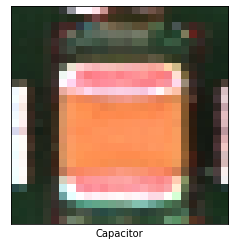

            file name prediction
0  11-0978-01_264.jpg  Capacitor


In [3]:
p.test('.\\Images\\Capacitor\\11-0978-01_264.jpg')

## Multiple Prediction
(folder containing all files needed to be predicted)

In [4]:
path = './Images/Capacitor/Reserved'
p.test(path)

                     file name prediction
0          11-3032-01_4764.jpg  Capacitor
1          11-3032-01_4765.jpg  Capacitor
2          11-3032-01_4766.jpg  Capacitor
3          11-3032-01_4767.jpg  Capacitor
4          11-3032-01_4768.jpg  Capacitor
5          11-3032-01_4769.jpg  Capacitor
6          11-3032-01_4771.jpg  Capacitor
7          11-3032-01_4772.jpg  Capacitor
8          11-3032-01_4774.jpg  Capacitor
9          11-3032-01_4775.jpg  Capacitor
10         2113946b04_3968.jpg  Capacitor
11         2113946b04_3984.jpg  Capacitor
12         2113946e02_4325.jpg  Capacitor
13         2113946e02_4343.jpg  Capacitor
14         2113946k02_3678.jpg  Capacitor
15         2113946k02_3882.jpg  Capacitor
16         2113946k02_4178.jpg  Capacitor
17         2113946k02_4369.jpg  Capacitor
18         2113956a51_3535.jpg  Capacitor
19         2113956a51_3536.jpg  Capacitor
20         2113956a51_3538.jpg  Capacitor
21         2113956a51_3558.jpg  Capacitor
22         2113956a51_3575.jpg  Ca